## Credit Delinquency Prediction


### Problem statement

Delinquency describes something or someone who fails to accomplish that which is required by law, duty, or contractual agreement, such as the failure to make a required payment or perform a particular action.

Credit scoring algorithms, which makes a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This use-case requires learners to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial delinquency in the next two years.

### Dataset description
The dataset consists of 150000 records and 11 features. Below are the 11 features and their descriptions.

|Feature|Description|
|-----|-----|
|SeriousDlqin2yrs|Person experienced 90 days past due delinquency or worse|
|RevolvingUtilizationOfUnsecuredLines| Total balance on credit cards and personal lines of credit|
|age| Age of borrower in years|
|NumberOfTime30-59DaysPastDueNotWorse| Number of times borrower has been 30-59 days past due but no worse in the last 2 years|
|DebtRatio| Monthly debt payments, alimony,living costs divided by monthy gross income|
|MonthlyIncome|Monthly Income|
|NumberOfOpenCreditLinesAndLoans| Number of Open loans (installment like car loan or mortgage) and Lines of credit|
|NumberOfTimes90DaysLate|Number of times borrower has been 90 days or more past due|
|NumberRealEstateLoansOrLines| Number of mortgage and real estate loans including home equity lines of credit|
|NumberOfTime60-89DaysPastDueNotWorse| Number of times borrower has been 60-89 days past due but no worse in the last 2 years|
|NumberOfDependents|Number of dependents in family excluding themselves|

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Task 1 :Load the data and get an overview of the data using `.describe()` and `.info()` method

In [4]:
df = pd.read_csv('fin_dataset.csv',index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Task 2 : Check for the skewness in the variables in `NumberOfDependents`  and `MonthlyIncome` by plotting a histogram.

SeriousDlqin2yrs


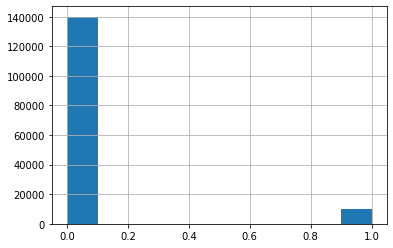

RevolvingUtilizationOfUnsecuredLines


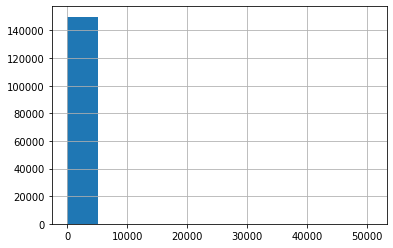

age


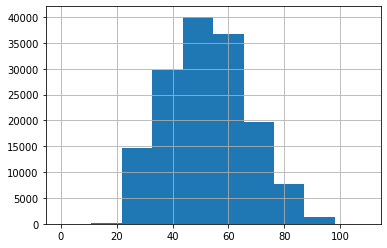

NumberOfTime30-59DaysPastDueNotWorse


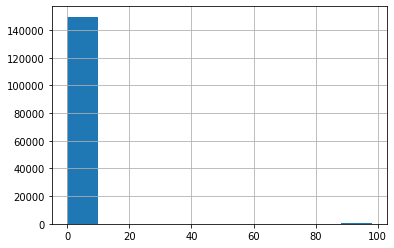

DebtRatio


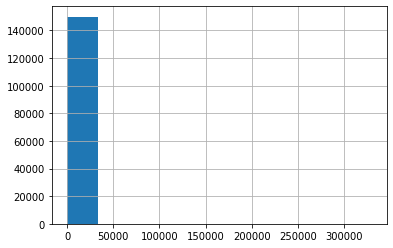

MonthlyIncome


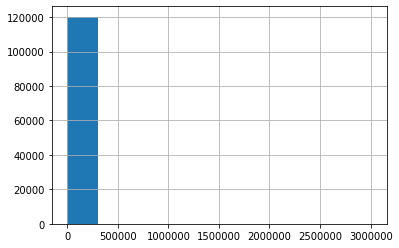

NumberOfOpenCreditLinesAndLoans


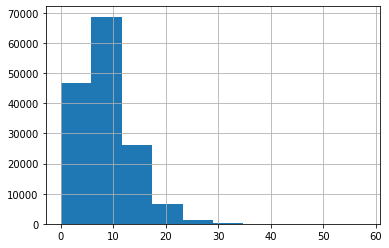

NumberOfTimes90DaysLate


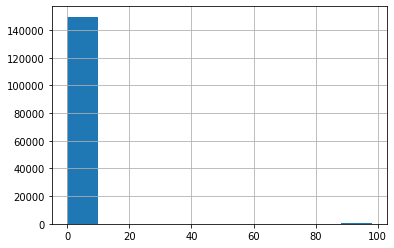

NumberRealEstateLoansOrLines


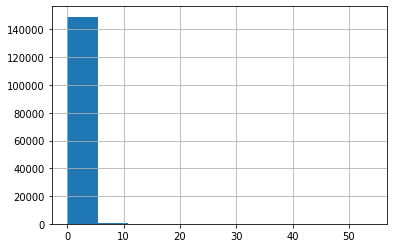

NumberOfTime60-89DaysPastDueNotWorse


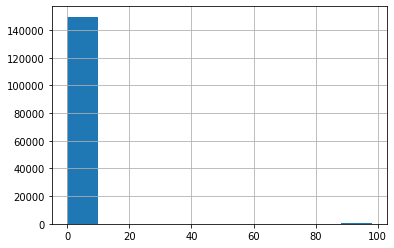

NumberOfDependents


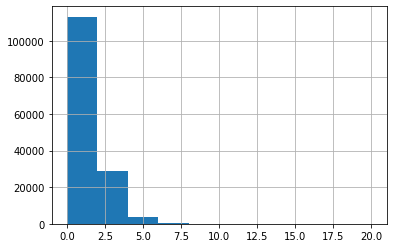

In [5]:
for col in df.columns:
    print(col)
    df[col].hist()
    plt.show()

### Task 3 :There is skewness in the feature `NumberOfDependents`. So let's replace the null values in this feature with the median and let's do the same for the feature `MonthlyIncome`

In [6]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(),inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

In [8]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Task 4: Check for the distribution of the target variable using a `countplot()`

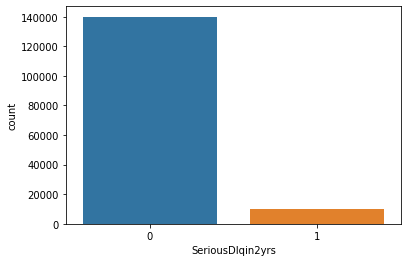

In [9]:
sns.countplot(df['SeriousDlqin2yrs'])

### Task 5 : Seperate the predictors and the target and split the data into training set and testing set. Keep the `test_size = 0.2` and the `random_state=42` 

In [10]:
X = df.drop('SeriousDlqin2yrs',1)
y = df['SeriousDlqin2yrs']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

### Task 6 : For a better method of inference, let's check for the correlation between different features by plotting a heatmap. The basic rule of feature selection is that we need to select features which are highly correlated to the dependent variable and also not highly correlated with each other as they show the same trend. 

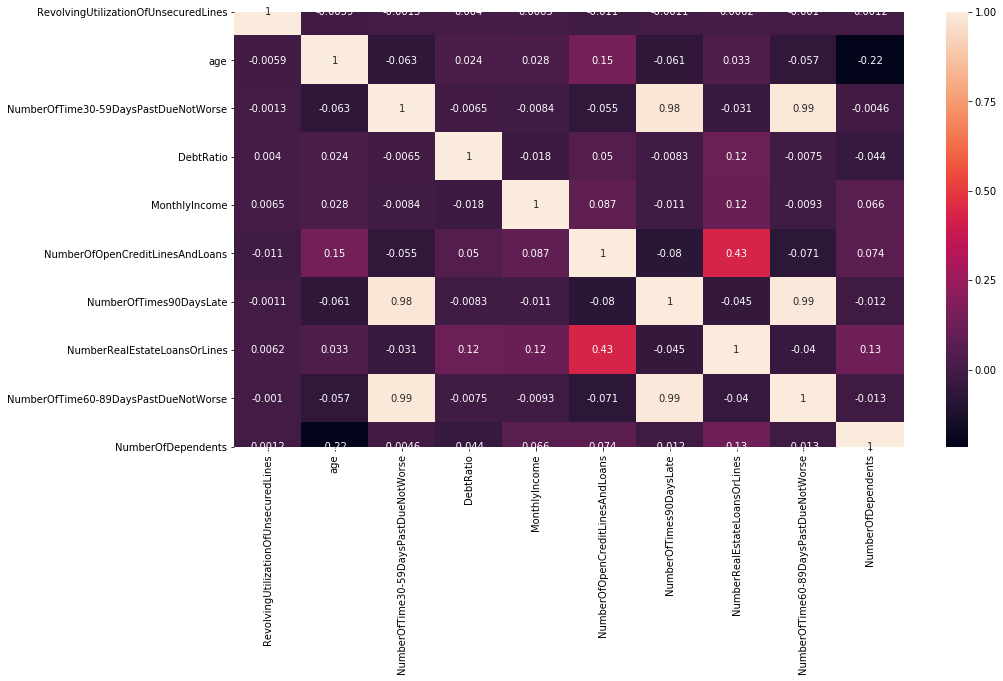

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True)

### Task 7 : We can see that the features `NumberOfTime60-89DaysPastDueNotWorse` is highly correlated along with the features `NumberOfTime30-59DaysPastDueNotWorse` and `NumberOfTimes90DaysLate`. So let's drop the features `NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTime30-59DaysPastDueNotWorse` from the train as well as the test data

In [13]:
X_train.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],1,inplace=True)
X_test.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],1,inplace=True)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 104026 to 121959
Data columns (total 8 columns):
RevolvingUtilizationOfUnsecuredLines    120000 non-null float64
age                                     120000 non-null int64
DebtRatio                               120000 non-null float64
MonthlyIncome                           120000 non-null float64
NumberOfOpenCreditLinesAndLoans         120000 non-null int64
NumberOfTimes90DaysLate                 120000 non-null int64
NumberRealEstateLoansOrLines            120000 non-null int64
NumberOfDependents                      120000 non-null float64
dtypes: float64(4), int64(4)
memory usage: 8.2 MB


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 59771 to 49316
Data columns (total 8 columns):
RevolvingUtilizationOfUnsecuredLines    30000 non-null float64
age                                     30000 non-null int64
DebtRatio                               30000 non-null float64
MonthlyIncome                           30000 non-null float64
NumberOfOpenCreditLinesAndLoans         30000 non-null int64
NumberOfTimes90DaysLate                 30000 non-null int64
NumberRealEstateLoansOrLines            30000 non-null int64
NumberOfDependents                      30000 non-null float64
dtypes: float64(4), int64(4)
memory usage: 2.1 MB


### Task 8 : Fit a vanilla Logistic Regression model on the training set and predict on the test set and plot the confusion matrix, accuracy, precision, recall and F1_score for the predicted model 

In [16]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_lr_proba = np.array(pd.DataFrame(model_lr.predict_proba(X_test)).iloc[:,1])
model_lr.score(X_test,y_test)

0.9349

In [17]:
print("Accuracy = " , accuracy_score(y_test, y_pred_lr))
print("Precision = " ,precision_score(y_test, y_pred_lr))
print("Recall = " ,recall_score(y_test, y_pred_lr))
print("F1 Score = " ,f1_score(y_test, y_pred_lr))

pd.crosstab(y_pred_lr, y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.9349
Precision =  0.5283018867924528
Recall =  0.014314928425357873
F1 Score =  0.027874564459930314


Actual,0,1
Predicted,,
0,28019,1928
1,25,28


### Task 9 : Set the parameter `class_weight=balanced` inside Logistic Regression and check for the metrics calculated above and also the confusion matrix

In [18]:
model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_lr_proba = np.array(pd.DataFrame(model_lr.predict_proba(X_test)).iloc[:,1])
model_lr.score(X_test,y_test)

0.6890666666666667

In [19]:
print("Accuracy = " , accuracy_score(y_test, y_pred_lr))
print("Precision = " ,precision_score(y_test, y_pred_lr))
print("Recall = " ,recall_score(y_test, y_pred_lr))
print("F1 Score = " ,f1_score(y_test, y_pred_lr))

pd.crosstab(y_pred_lr, y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.6890666666666667
Precision =  0.12517795403701443
Recall =  0.6293456032719836
F1 Score =  0.2088210347752332


Actual,0,1
Predicted,,
0,19441,725
1,8603,1231


### Task 10 : Perform Random Undersampling on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

In [36]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_sample2,y_sample2 = rus.fit_sample(X_train,y_train)
model_rus = LogisticRegression()
model_rus.fit(X_sample2,y_sample2)
y_pred_lr = model_rus.predict(X_test)



In [37]:
print("Accuracy = " , accuracy_score(y_test, y_pred_lr))
print("Precision = " ,precision_score(y_test, y_pred_lr))
print("Recall = " ,recall_score(y_test, y_pred_lr))
print("F1 Score = " ,f1_score(y_test, y_pred_lr))

pd.crosstab(y_pred_lr, y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.6797333333333333
Precision =  0.1231284475965327
Recall =  0.6390593047034765
F1 Score =  0.2064750578130162


Actual,0,1
Predicted,,
0,19142,706
1,8902,1250


### Task 11 : Perform Tomek Undersampling on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

In [24]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_sample4,y_sample4 = tl.fit_sample(X_train,y_train)
model_tl = LogisticRegression()
model_tl.fit(X_sample4,y_sample4)
y_pred_lr = model_tl.predict(X_test)

In [25]:
print("Accuracy = " , accuracy_score(y_test, y_pred_lr))
print("Precision = " ,precision_score(y_test, y_pred_lr))
print("Recall = " ,recall_score(y_test, y_pred_lr))
print("F1 Score = " ,f1_score(y_test, y_pred_lr))

pd.crosstab(y_pred_lr, y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.9349
Precision =  0.5283018867924528
Recall =  0.014314928425357873
F1 Score =  0.027874564459930314


Actual,0,1
Predicted,,
0,28019,1928
1,25,28


### Task 12 : Perform Random Oversampling on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

In [34]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_sample5,y_sample5 = ros.fit_sample(X_train,y_train)
model_ros = LogisticRegression()
model_ros.fit(X_sample5,y_sample5)
y_pred_lr = model_ros.predict(X_test)

In [35]:
print("Accuracy = " , accuracy_score(y_test, y_pred_lr))
print("Precision = " ,precision_score(y_test, y_pred_lr))
print("Recall = " ,recall_score(y_test, y_pred_lr))
print("F1 Score = " ,f1_score(y_test, y_pred_lr))

pd.crosstab(y_pred_lr, y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.7148666666666667
Precision =  0.13344444444444445
Recall =  0.6140081799591002
F1 Score =  0.21924059875867102


Actual,0,1
Predicted,,
0,20245,755
1,7799,1201


### Task 13 : Perform SMOTE on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sample6,y_sample6 = smote.fit_sample(X_train,y_train)
model_smote = LogisticRegression()
model_smote.fit(X_sample6,y_sample6)
y_pred_lr = model_smote.predict(X_test)


In [31]:
print("Accuracy = " , accuracy_score(y_test, y_pred_lr))
print("Precision = " ,precision_score(y_test, y_pred_lr))
print("Recall = " ,recall_score(y_test, y_pred_lr))
print("F1 Score = " ,f1_score(y_test, y_pred_lr))

pd.crosstab(y_pred_lr, y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.7129666666666666
Precision =  0.13219851884602632
Recall =  0.6114519427402862
F1 Score =  0.21739525583931657


Actual,0,1
Predicted,,
0,20193,760
1,7851,1196
